In [2]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Load Data
df = pd.read_csv('all.csv')

# Select required columns
df = df[['country', 'Year', 'Region', 'Total energy production (Mtoe)', 'Total energy consumption (Mtoe)', 'Average CO2 emission factor (tCO2/toe)']]

# Remove rows with missing values
df = df.dropna()

# Set independent variable (X) and dependent variable (y)
X = df[['Total energy production (Mtoe)', 'Total energy consumption (Mtoe)']]
y = df['Average CO2 emission factor (tCO2/toe)']

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = []


# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Add a constant term
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    
    # Regression Model Fitting
    model = sm.OLS(y_train, X_train).fit()
    
    # Performing predictions on test data
    y_pred = model.predict(X_test)
    
    # MSE calculation
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Output the results
print(f"MSE scores for each fold: {mse_scores}")
print(f"Average MSE: {sum(mse_scores) / len(mse_scores)}")


MSE scores for each fold: [0.3112656862795878, 0.2993075074810658, 0.30375019610302306, 0.3304031959232868, 0.29617230668282774]
Average MSE: 0.3081797784939582


Best K for Random Forest Regression: 11
Accuracy: 48.55%
Random Forest Regression MSE with best parameters: 0.16219300790005978
Random Forest Regression R-squared with best parameters: 0.4854639173400862


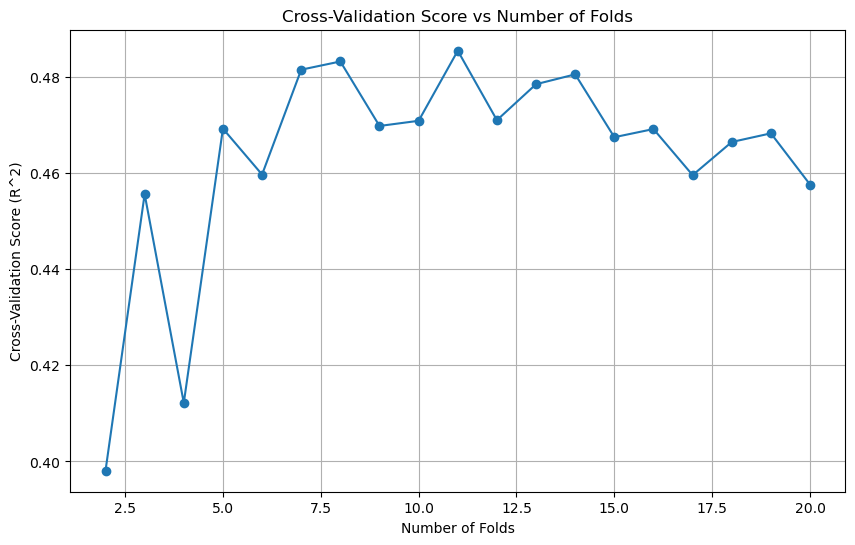

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load Data
df = pd.read_csv('all.csv')

# Select required columns
df = df[['Total energy production (Mtoe)', 'Total energy consumption (Mtoe)', 'Average CO2 emission factor (tCO2/toe)']]

# Remove rows with missing values
df = df.dropna()

# Set independent variable (X) and dependent variable (y)
X = df[['Total energy production (Mtoe)', 'Total energy consumption (Mtoe)']]
y = df['Average CO2 emission factor (tCO2/toe)']

# Set k value range
k_values = range(2, 21)
cv_scores = []

# Perform cross-validation for each value of k
for k in k_values:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    model = RandomForestRegressor(random_state=42)
    scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    cv_scores.append(scores.mean())

# Find the optimal k value
best_k = k_values[np.argmax(cv_scores)]
print(f"Best K for Random Forest Regression: {best_k}")

# Learn and evaluate models with optimal k values
kf = KFold(n_splits=best_k, shuffle=True, random_state=42)
model = RandomForestRegressor(random_state=42)

mse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mse_scores.append(mse)
    r2_scores.append(r2)

average_mse = np.mean(mse_scores)
average_r2 = np.mean(r2_scores)
accuracy = average_r2 * 100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Random Forest Regression MSE with best parameters: {average_mse}")
print(f"Random Forest Regression R-squared with best parameters: {average_r2}")

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of Folds')
plt.ylabel('Cross-Validation Score (R^2)')
plt.title('Cross-Validation Score vs Number of Folds')
plt.grid(True)
plt.show()